In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path = os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
sns.set_theme("paper")

In [4]:
data = pd.read_csv(path, index_col=0)

In [5]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [7]:
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
num_vars = data.select_dtypes(include=np.number)
num_vars = num_vars.drop('price', axis=1)
num_vars.head()

,carat,depth,table,x,y,z
1,0.23,61.5,55.0,3.95,3.98,2.43
2,0.21,59.8,61.0,3.89,3.84,2.31
3,0.23,56.9,65.0,4.05,4.07,2.31
4,0.29,62.4,58.0,4.20,4.23,2.63
5,0.31,63.3,58.0,4.34,4.35,2.75


Text(0.5, 0.92, 'Distribution of feature variables')

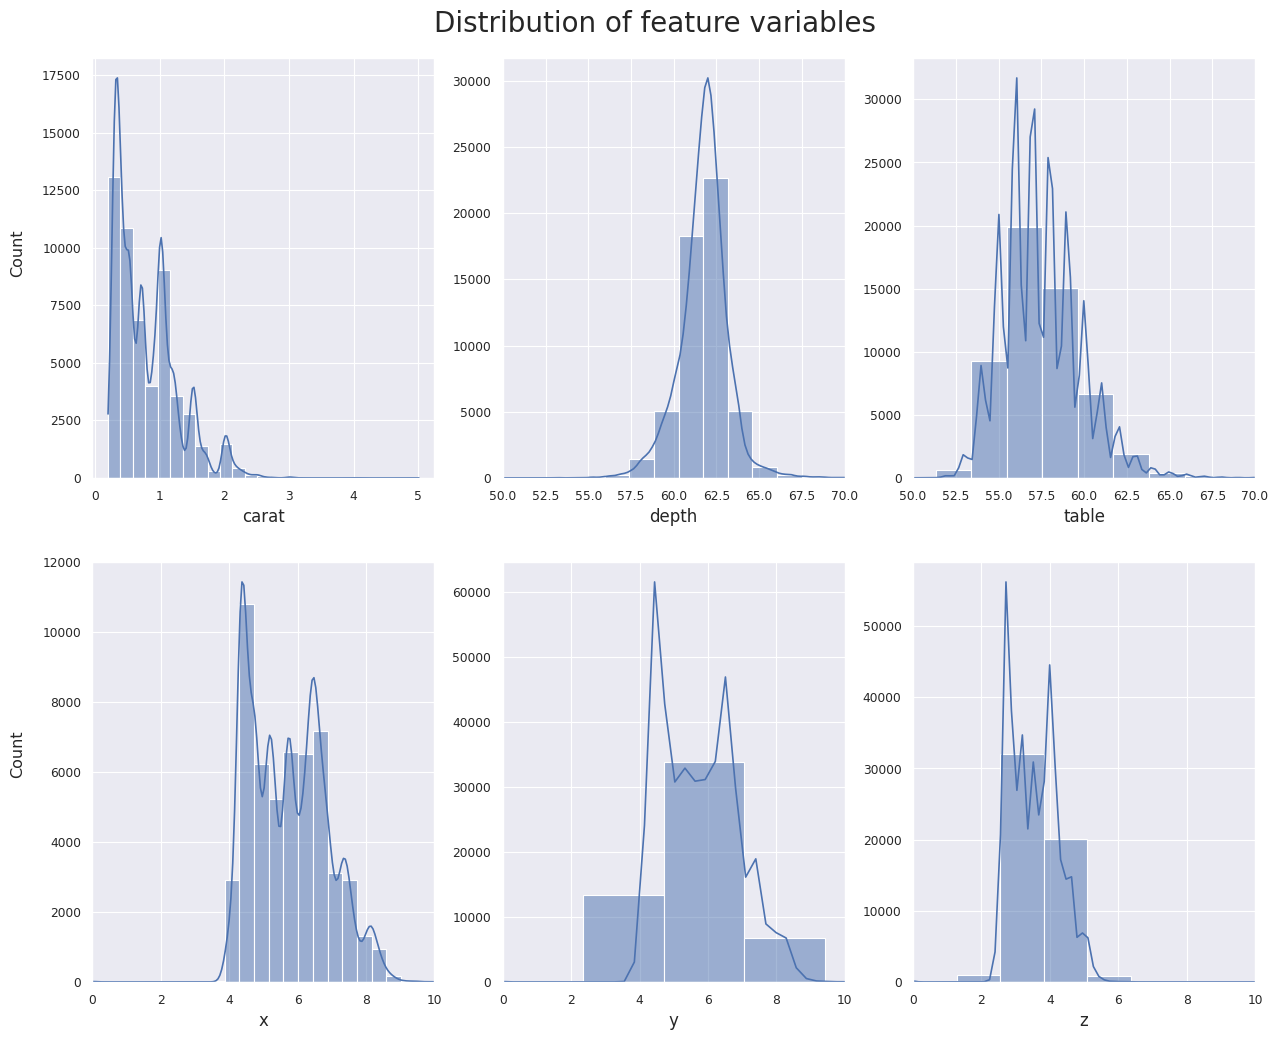

In [10]:
hist_fig, _ = plt.subplots(2,3, figsize=(15,12))
axs= hist_fig.axes
for i, col in enumerate(num_vars.columns):
    sns.histplot(data=data, x=col, kde=True, bins=25, ax=axs[i])

for ax in axs:
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)
    ax.set_ylabel(None)
    if ax.get_xlabel() in ['x','y', 'z']:
        ax.set_xlim(0,10)
    if ax.get_xlabel() in ['table', 'depth']:
        ax.set_xlim(50,70)

hist_fig.text(s="Count", x=0.07, y=0.7, rotation=90, fontsize="large")
hist_fig.supylabel("Count", x=0.07, y=0.3)
hist_fig.figure.suptitle(
        "Distribution of feature variables", 
        x=0.5, 
        y=0.92, 
        fontsize=20, 
        fontweight="book"
    )

Text(0.5, 1.0, 'Distribution of Price')

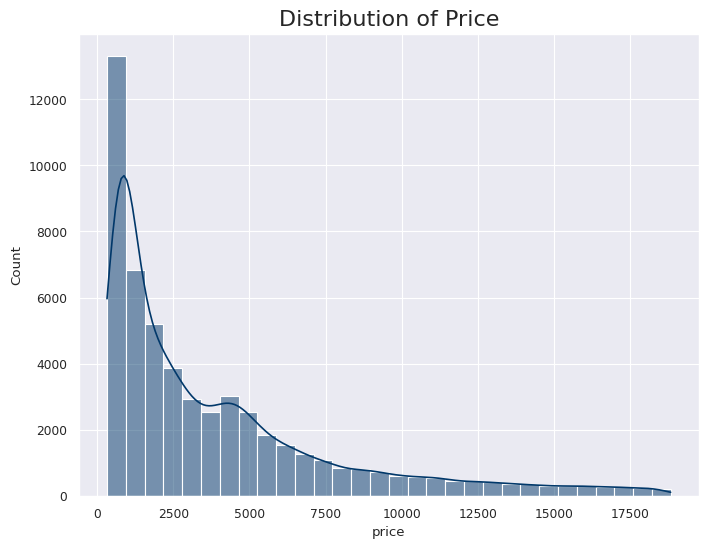

In [11]:
price_hist, axp = plt.subplots(figsize=(8,6))
sns.histplot(data=data, x='price', kde=True, ax=axp, bins=30, color="xkcd:marine blue")
axp.set_title("Distribution of Price", fontsize=16, fontweight="book")

Text(0.5, 1.0, 'KDE of price')

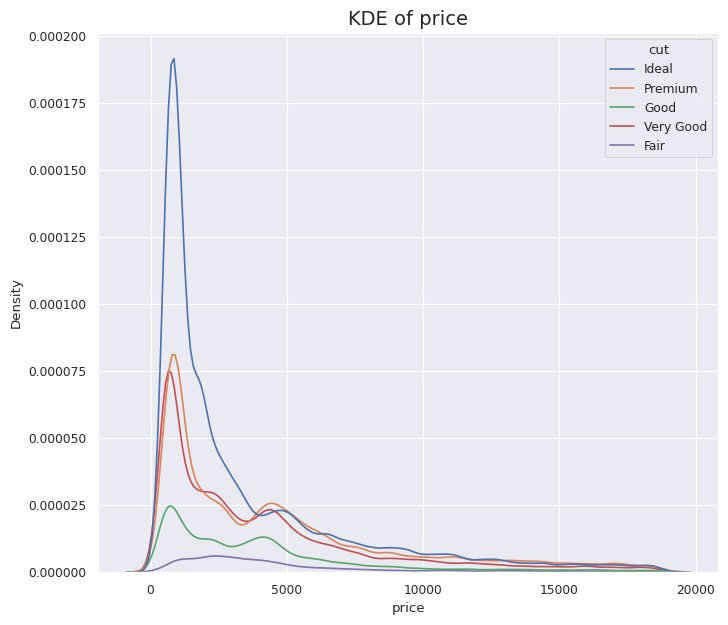

In [12]:
fig_pc, ax_pc = plt.subplots(figsize=(8,7))
sns.kdeplot(data=data, x="price", hue="cut",bw_adjust=0.5, ax=ax_pc)
ax_pc.set_title("KDE of price", fontsize=14, fontweight="book")

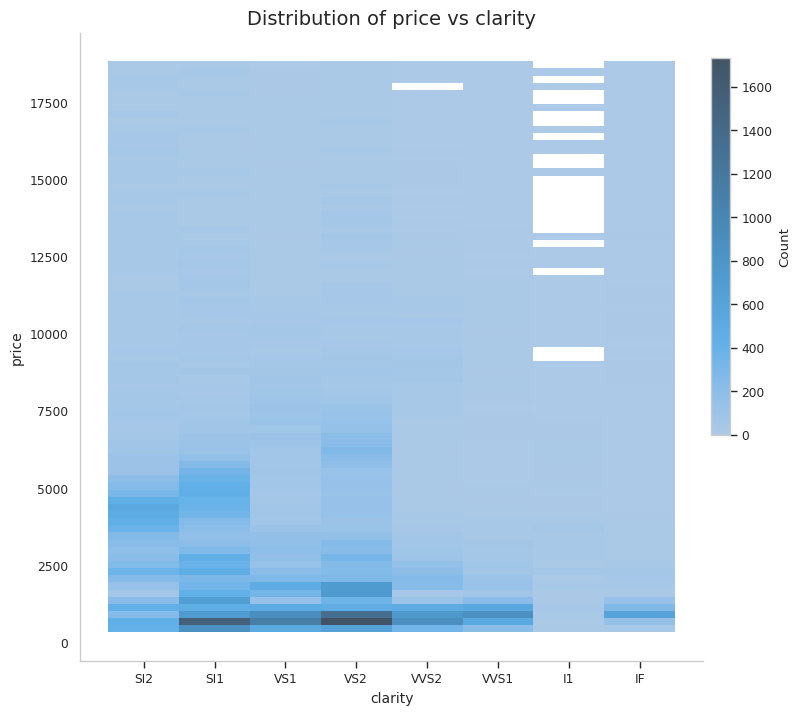

In [13]:
with sns.axes_style("white", rc={'axes.edgecolor':"0.8",'xtick.bottom': True}):
    p_clar = sns.displot(
        data=data,
        x="clarity", 
        y="price",
        kind="hist", 
        color="xkcd:dark slate blue",
        cbar=True,
        cbar_kws = dict(shrink=0.6, anchor=(0, 0.9), label='Count', pad=0.01),
        height=7, 
        aspect=1.2
    )
    p_clar.figure.axes[0].set_xlabel(p_clar.figure.axes[0].get_xlabel(), fontsize=10)
    p_clar.figure.axes[0].set_ylabel(p_clar.figure.axes[0].get_ylabel(), fontsize=10)
    p_clar.figure.axes[0].set_title('Distribution of price vs clarity', fontsize=14, fontweight="book")

Text(0.5, 1.0, 'Clarity vs Price(Mean)')

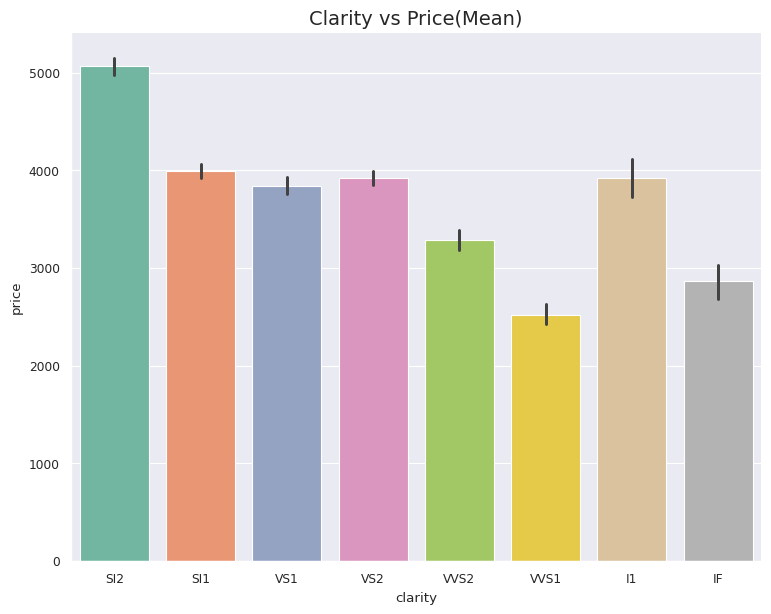

In [14]:
clar_p = sns.catplot(data=data, kind='bar', x="clarity", y='price',height=6, aspect=1.3, palette='Set2')
clar_p.ax.set_title("Clarity vs Price(Mean)", fontsize=14, fontweight="book")

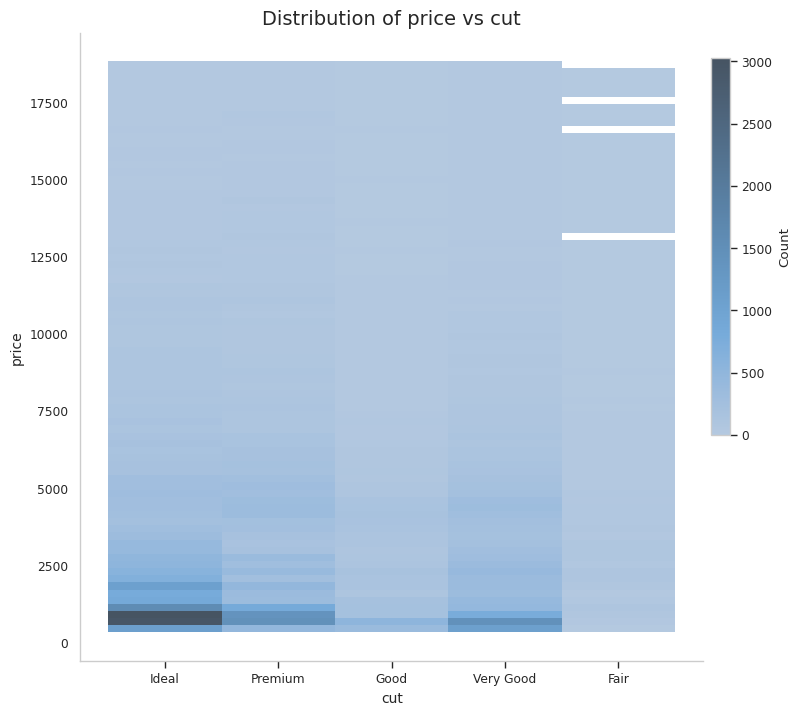

In [15]:
with sns.axes_style("white", rc={'axes.edgecolor':"0.8",'xtick.bottom': True}):
    p_cut = sns.displot(
        data=data,
        x="cut", 
        y="price",
        kind="hist", 
        color="xkcd:dusty blue",
        cbar=True,
        cbar_kws = dict(shrink=0.6, anchor=(0, 0.9), label='Count', pad=0.01),
        height=7, 
        aspect=1.2
    )
    p_cut.figure.axes[0].set_xlabel(p_cut.figure.axes[0].get_xlabel(), fontsize=10)
    p_cut.figure.axes[0].set_ylabel(p_cut.figure.axes[0].get_ylabel(), fontsize=10)
    p_cut.figure.axes[0].set_title('Distribution of price vs cut', fontsize=14, fontweight="book")

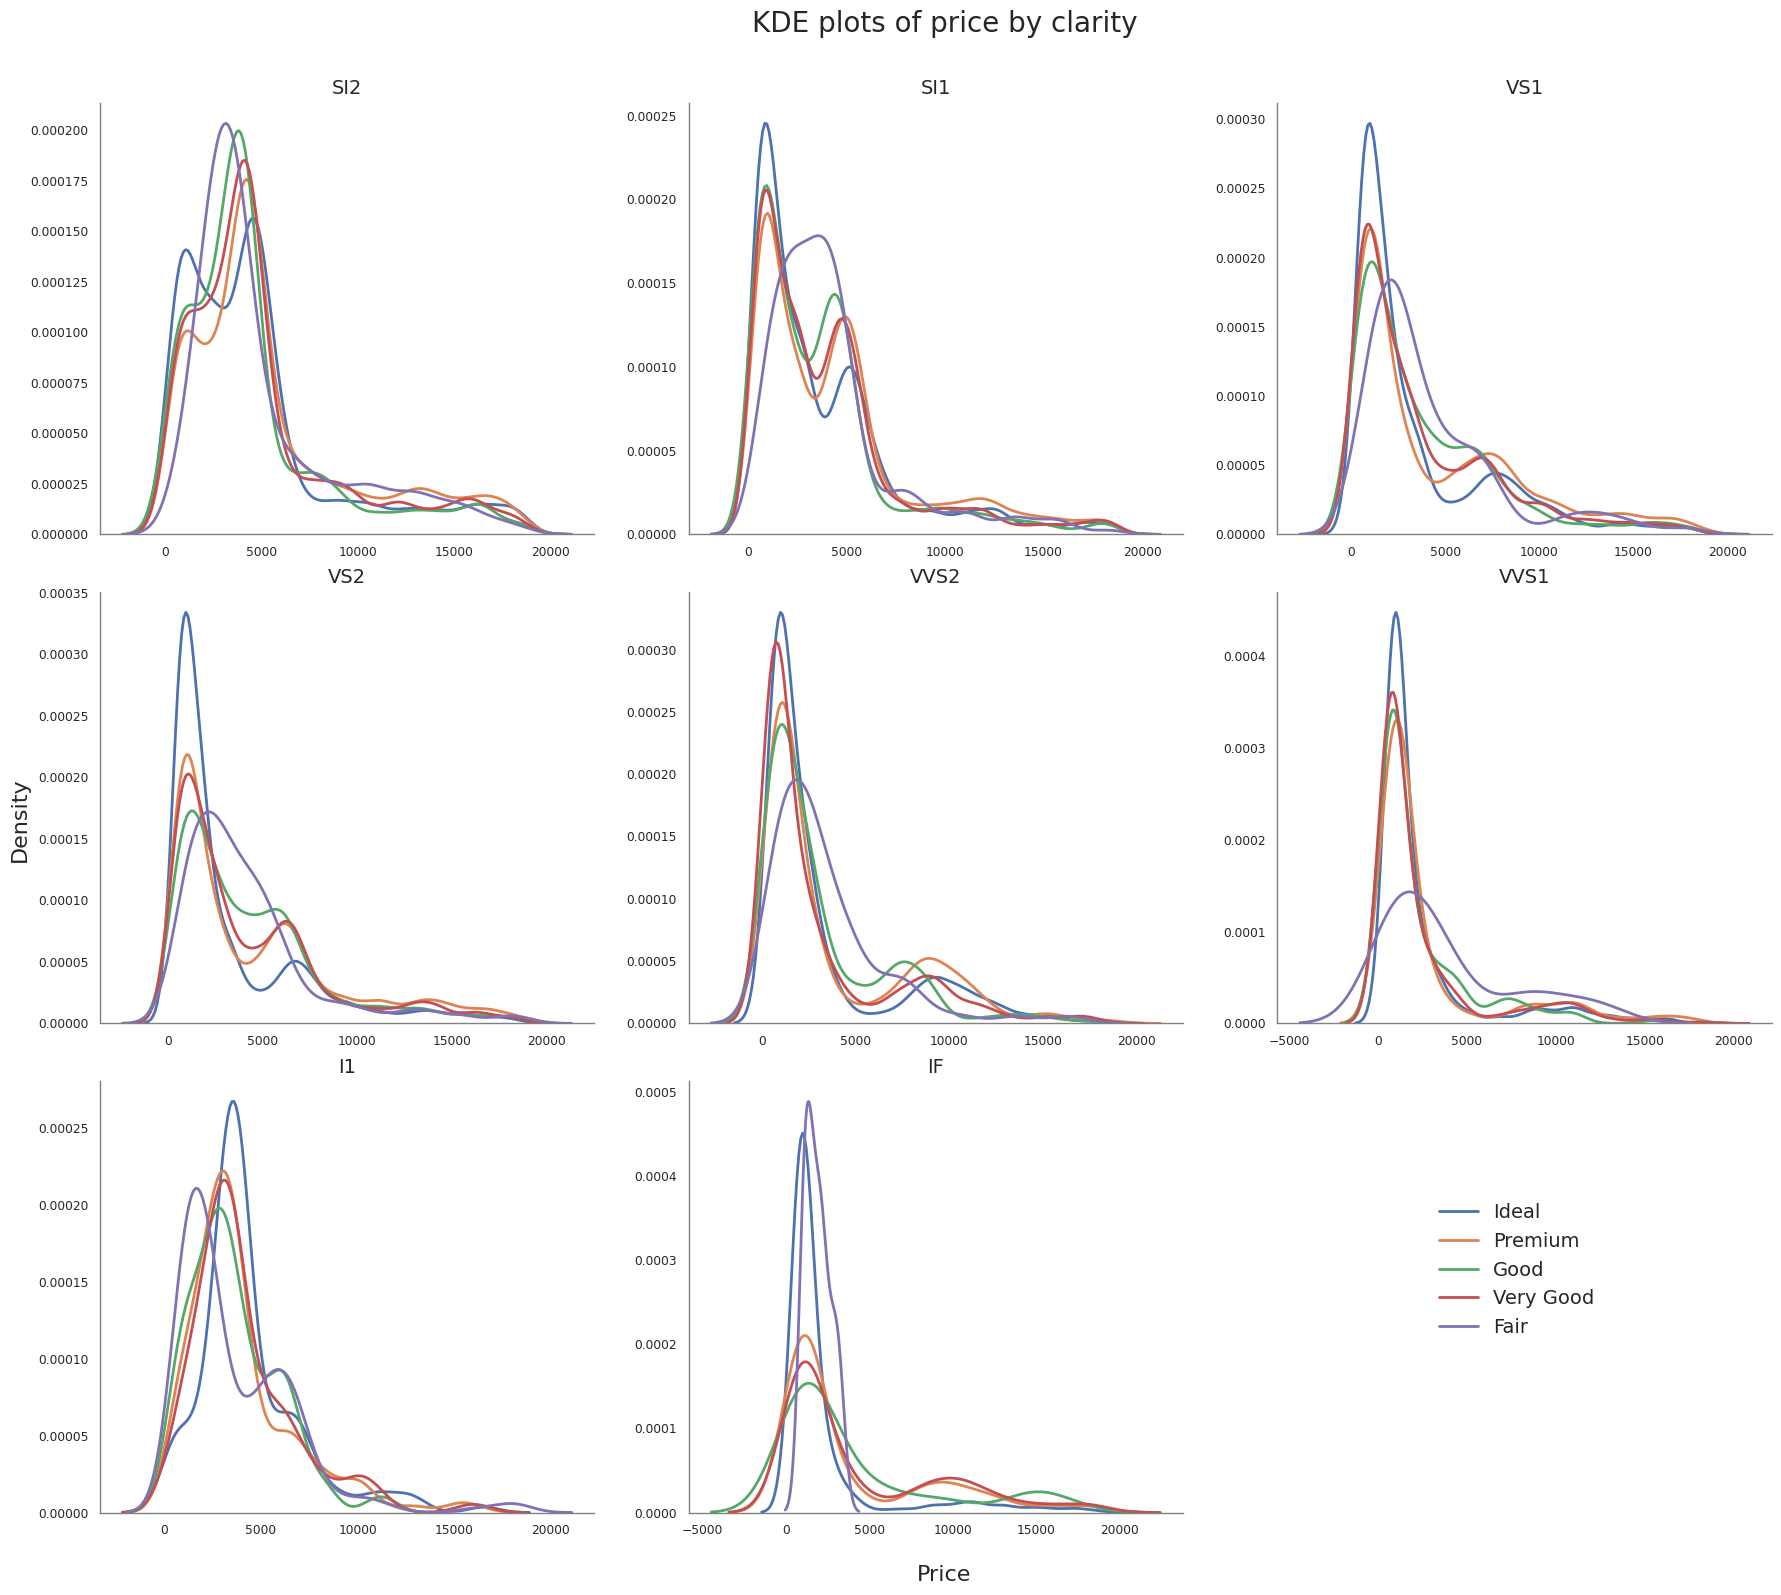

In [16]:
with sns.axes_style("white", rc={"axes.edgecolor":"0.5"}):
    fcc = sns.FacetGrid(
        data=data, 
        col='clarity',
        hue="cut",
        col_wrap=3,
        sharex=False,
        sharey=False,
        height=5, 
        aspect=1.2
    )
    fcc.map_dataframe(sns.kdeplot, x="price",bw_adjust=0.8, linewidth=2)
    fcc.set_titles(col_template="{col_name}", size=14)
    fcc.set_xlabels("")
    fcc.set_ylabels(None)
    fcc.figure.supylabel("Density", fontsize=16, x=0.01)
    fcc.figure.supxlabel("Price", fontsize=16, y=-0.01)
    fcc.figure.suptitle(
        "KDE plots of price by clarity", 
        x=0.5, 
        y=1.04, 
        fontsize=20, 
        fontweight="book"
    )
    fcc.add_legend()
    sns.move_legend(
        fcc, 
        loc="center", 
        bbox_to_anchor=(0.8, 0.2,), 
        fontsize=14, 
        title=None
    )
    

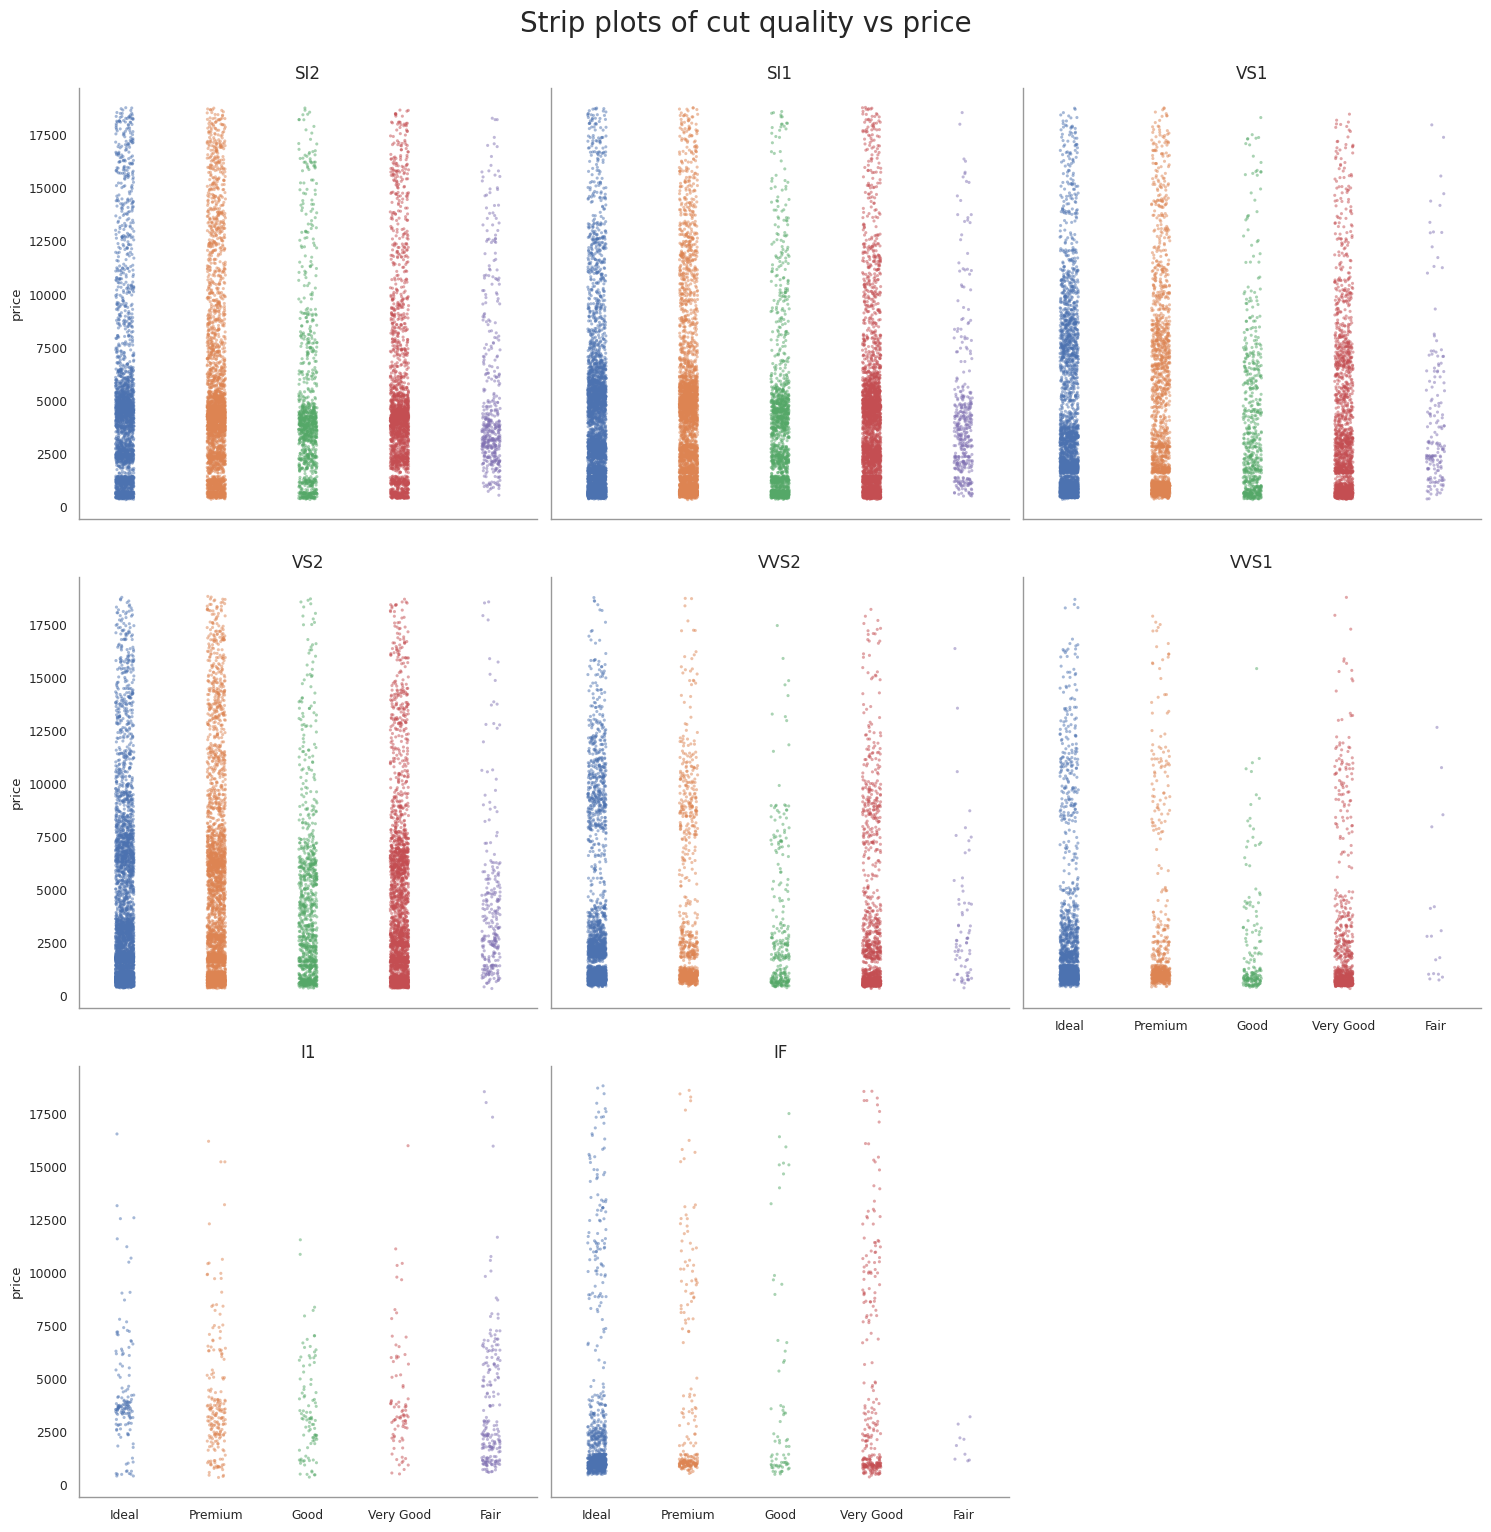

In [17]:
with sns.axes_style("white", rc={"axes.edgecolor": "0.6"}):
    scp = sns.catplot(
        data=data,
        x="cut",
        y='price', 
        hue="cut", 
        kind='strip', 
        s=5, 
        alpha=0.5, 
        col="clarity", 
        col_wrap=3
    )
    scp.set_titles(col_template="{col_name}", size=12)
    scp.set_xlabels("")
    scp.figure.suptitle(
            "Strip plots of cut quality vs price", 
            x=0.5, 
            y=1.03, 
            fontsize=20, 
            fontweight="book"
        )

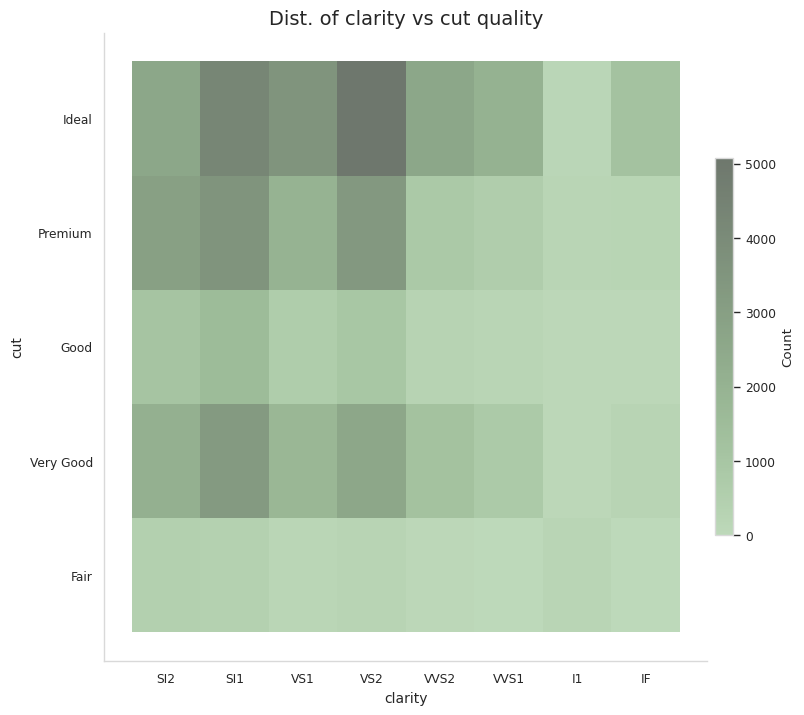

In [18]:
with sns.axes_style("white", rc={"axes.edgecolor":"0.85"}):
    cc = sns.displot(
        data=data, 
        x="clarity", 
        y="cut",
        alpha=0.8,
        height=7,
        aspect=1.2,
        color="xkcd:grey green", 
        cbar=True, 
        cbar_kws = dict(shrink=0.6, anchor=(0, 0.5), label='Count', pad=0.01)
    )
    cc.figure.axes[0].set_title("Dist. of clarity vs cut quality", fontsize=14, fontweight="book")
    cc.figure.axes[0].set_xlabel(cc.figure.axes[0].get_xlabel(), fontsize=10)
    cc.figure.axes[0].set_ylabel(cc.figure.axes[0].get_ylabel(), fontsize=10)

In [19]:
x_vars = ['x', 'y', 'z', 'carat', 'depth', 'table']
y_vars = 'price'

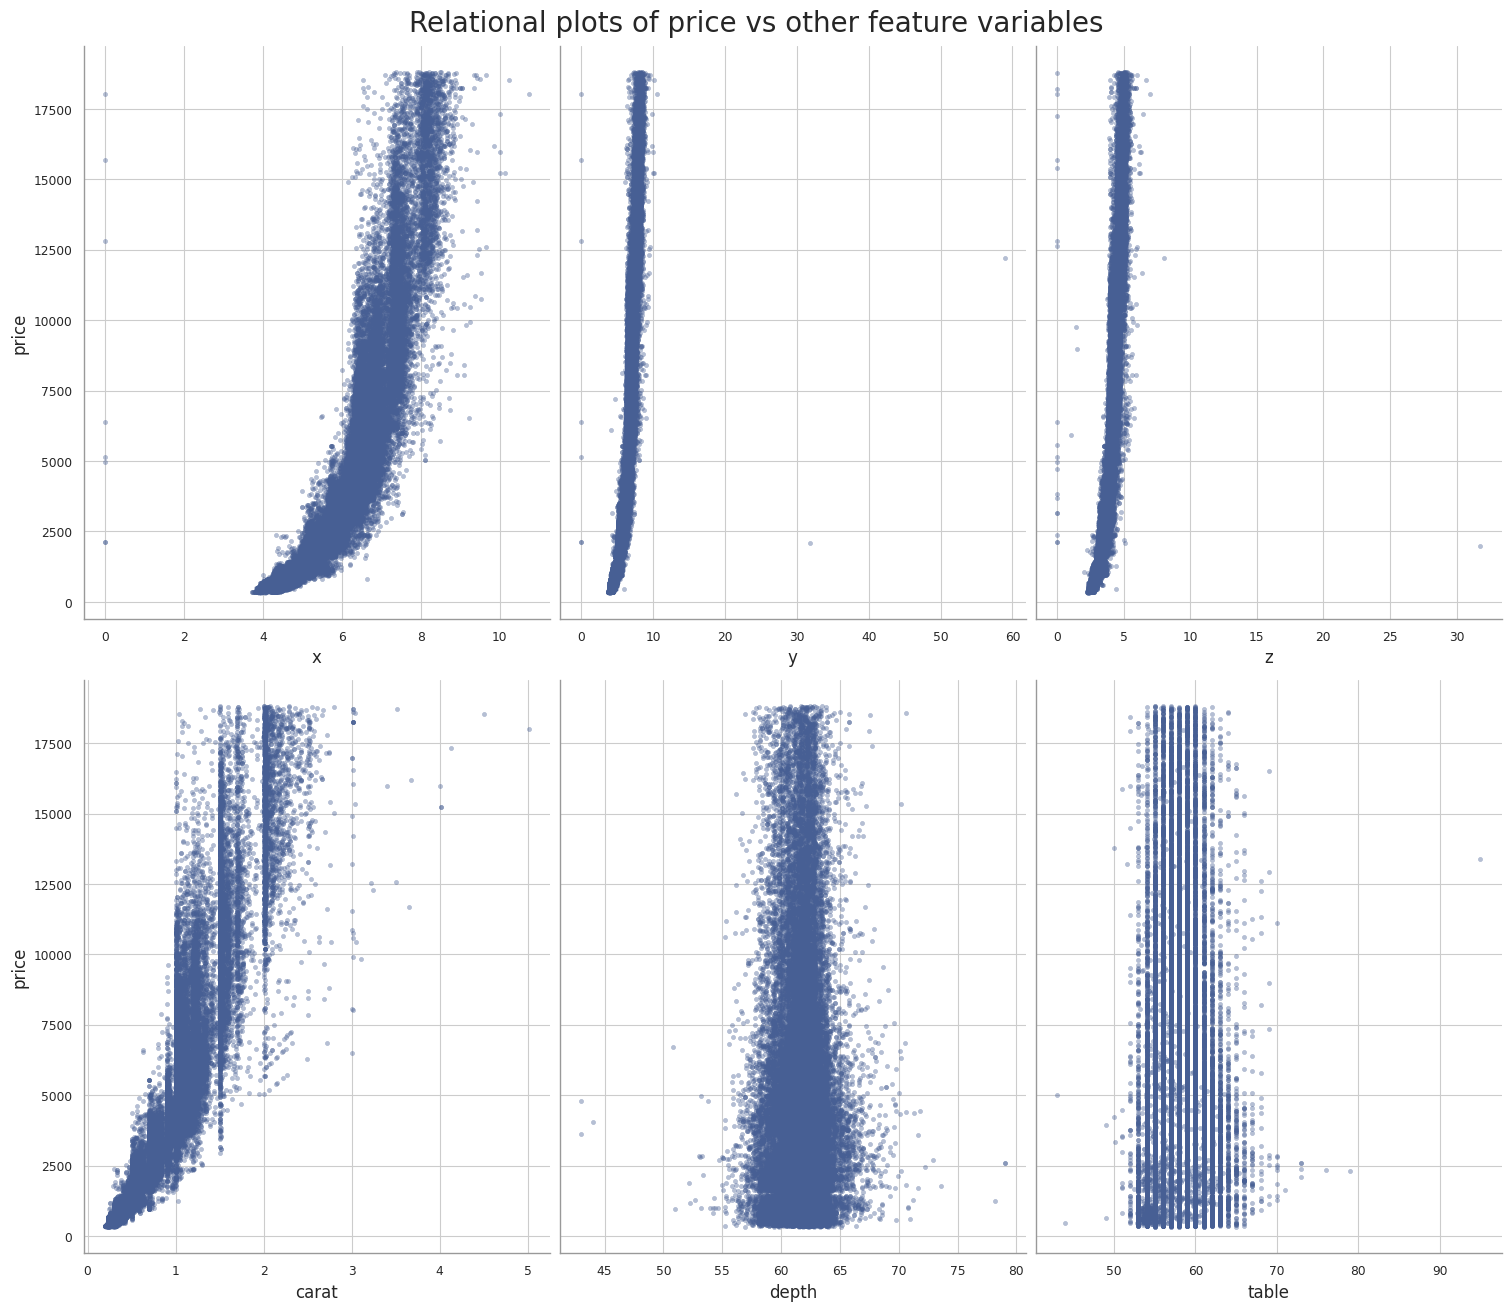

In [20]:
rc_params={
    "axes.spines.top":False, 
    "axes.spines.right":False,
    "axes.edgecolor":"0.6"
   }
with sns.axes_style("whitegrid", rc=rc_params):    
    price_pair, axes = plt.subplots(2, 3, figsize=(15, 13), sharey=True, layout='constrained')
    axs = axes.flatten()
    for i, x_var in enumerate(x_vars):
        sns.scatterplot(
            data=data,
            x=x_var,
            y='price',
            ax=axs[i],
            s=10, 
            color="xkcd:dusky blue",
            edgecolor='face', alpha=0.4
        )
    
    for ax in price_pair.axes:
        ax.set_xlabel(ax.get_xlabel(), fontsize=12)
        ax.set_ylabel(ax.get_ylabel(), fontsize=12)
    
    price_pair.suptitle("Relational plots of price vs other feature variables", fontsize=20, fontweight="book")

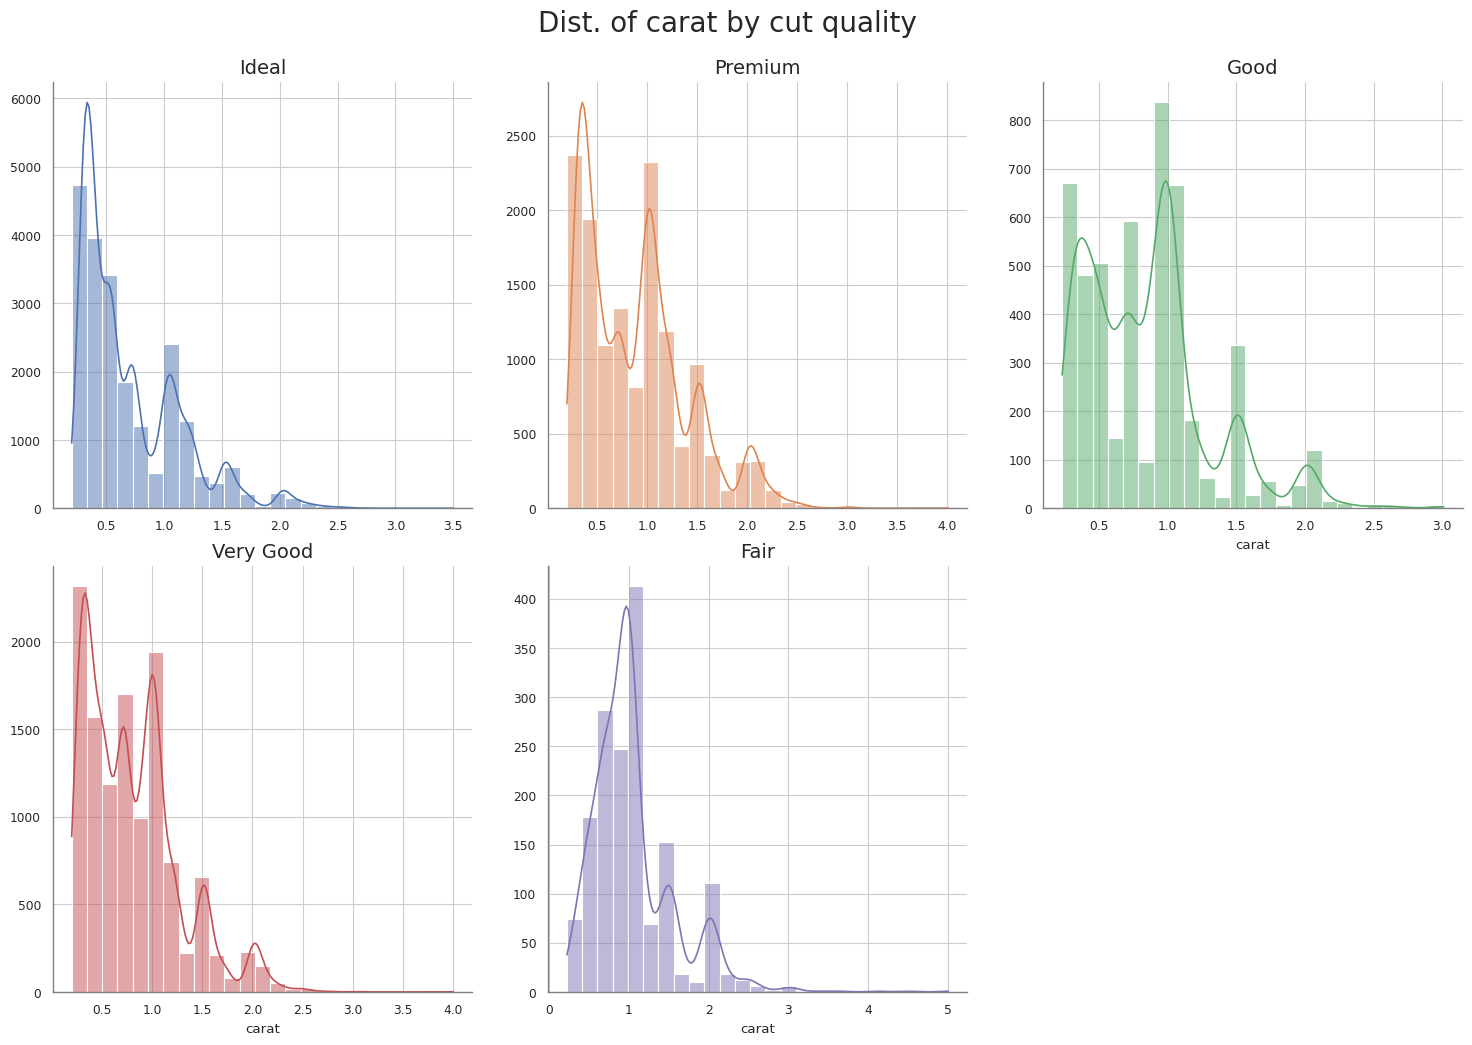

In [21]:
with sns.axes_style("whitegrid", rc={"axes.edgecolor":"0.5"}):
    fc = sns.FacetGrid(data=data, 
                      col="cut", 
                      hue="cut", 
                      col_wrap=3, 
                      height=5, 
                      sharex=False, 
                      sharey=False,
                     )
    fc.map_dataframe(sns.histplot, x="carat", bins=25, kde=True)
    fc.set_titles(col_template="{col_name}", size=14)
    fc.set_ylabels(None)
    fc.figure.suptitle("Dist. of carat by cut quality", x=0.5, y=1.04, fontsize=20, fontweight="book")

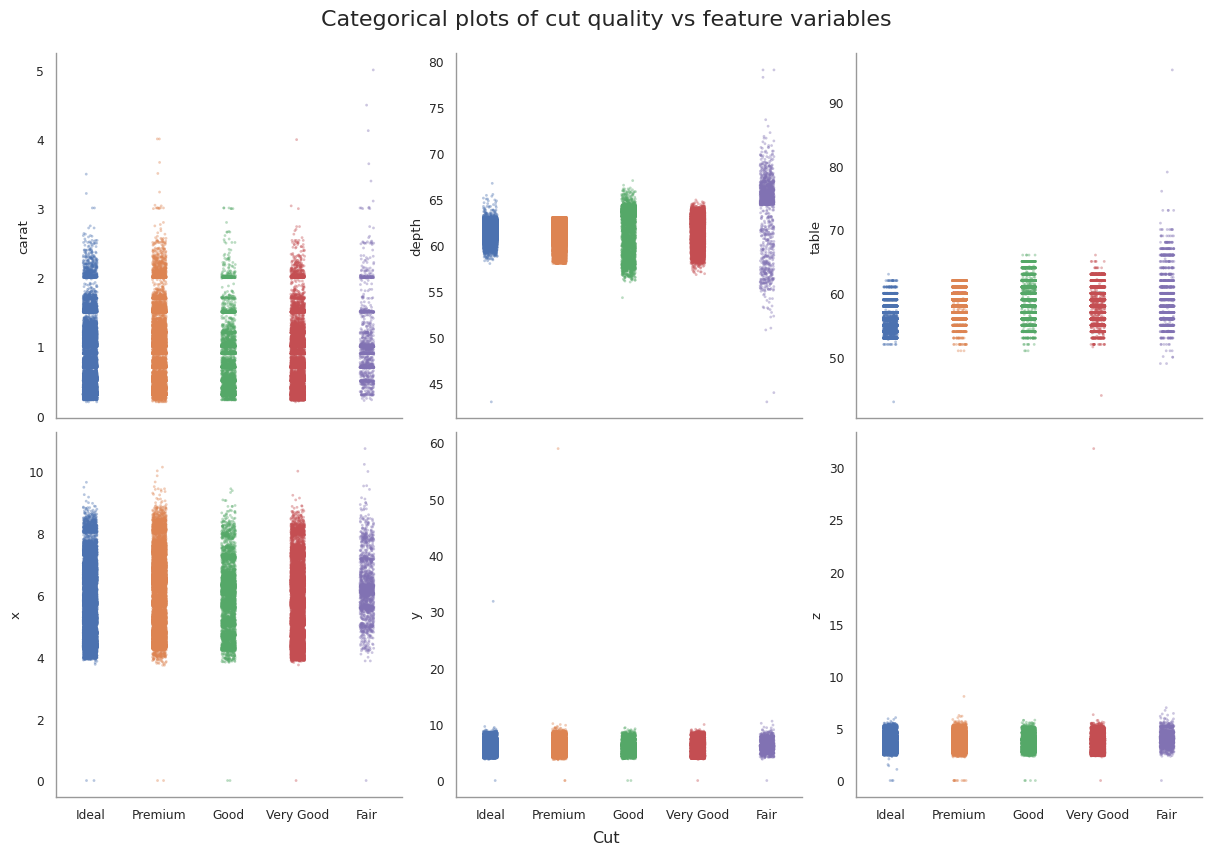

In [22]:
 with sns.axes_style("white", rc=rc_params):   
    strip_fig, _ = plt.subplots(2,3, figsize=(12,8), sharex=True, layout='constrained')

    axs = strip_fig.axes

    for i, col in enumerate(num_vars.columns):
        sns.stripplot(data=data, y=col, x='cut', hue='cut', ax=axs[i], s=2, alpha=0.4)
        axs[i].legend().remove()
        axs[i].set_xlabel("")

    strip_fig.supxlabel("Cut")

    strip_fig.suptitle(
            "Categorical plots of cut quality vs feature variables", 
            x=0.5, 
            y=1.05, 
            fontsize=16, 
            fontweight="book"
        )

Text(0.5, 1.02, 'Relational plots of feature variables')

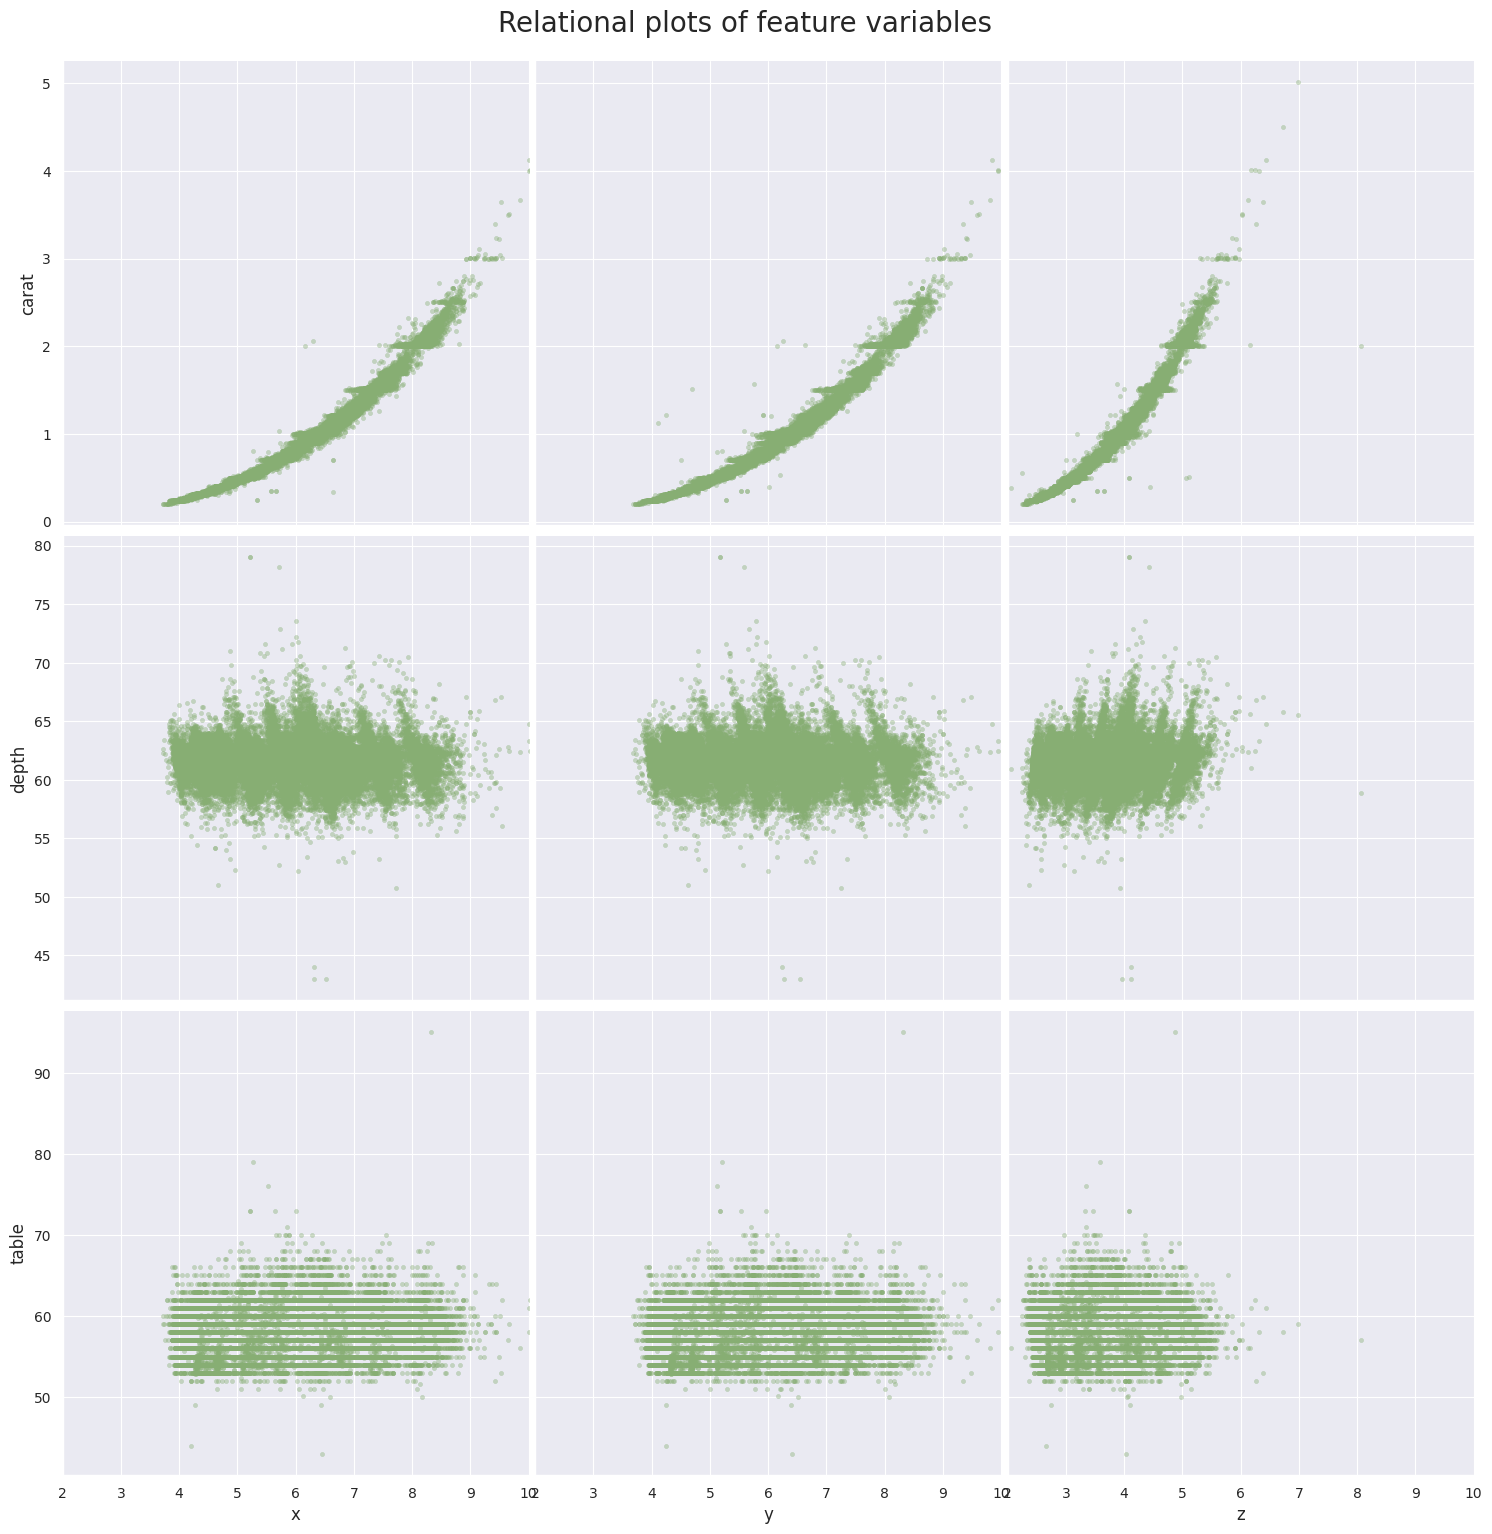

In [23]:
rel = sns.pairplot(data=data,
                    height=5, 
                    x_vars=['x', 'y', 'z'],
                    y_vars=["carat", "depth", "table"],
                    plot_kws=dict(s=10, color="xkcd:sage",edgecolor="face", alpha=0.4),
                    diag_kws=dict(bins=25, kde=True))
rel.tick_params(axis="both", labelsize=10)

for ax in rel.axes.flatten():
    if ax is not None:
        ax.set_xlabel(ax.get_xlabel(), fontsize=12)
        ax.set_ylabel(ax.get_ylabel(), fontsize=12)
        ax.set_xlim(2,10)
rel.figure.suptitle("Relational plots of feature variables", x=0.5, y=1.02, fontsize=20, fontweight="book")

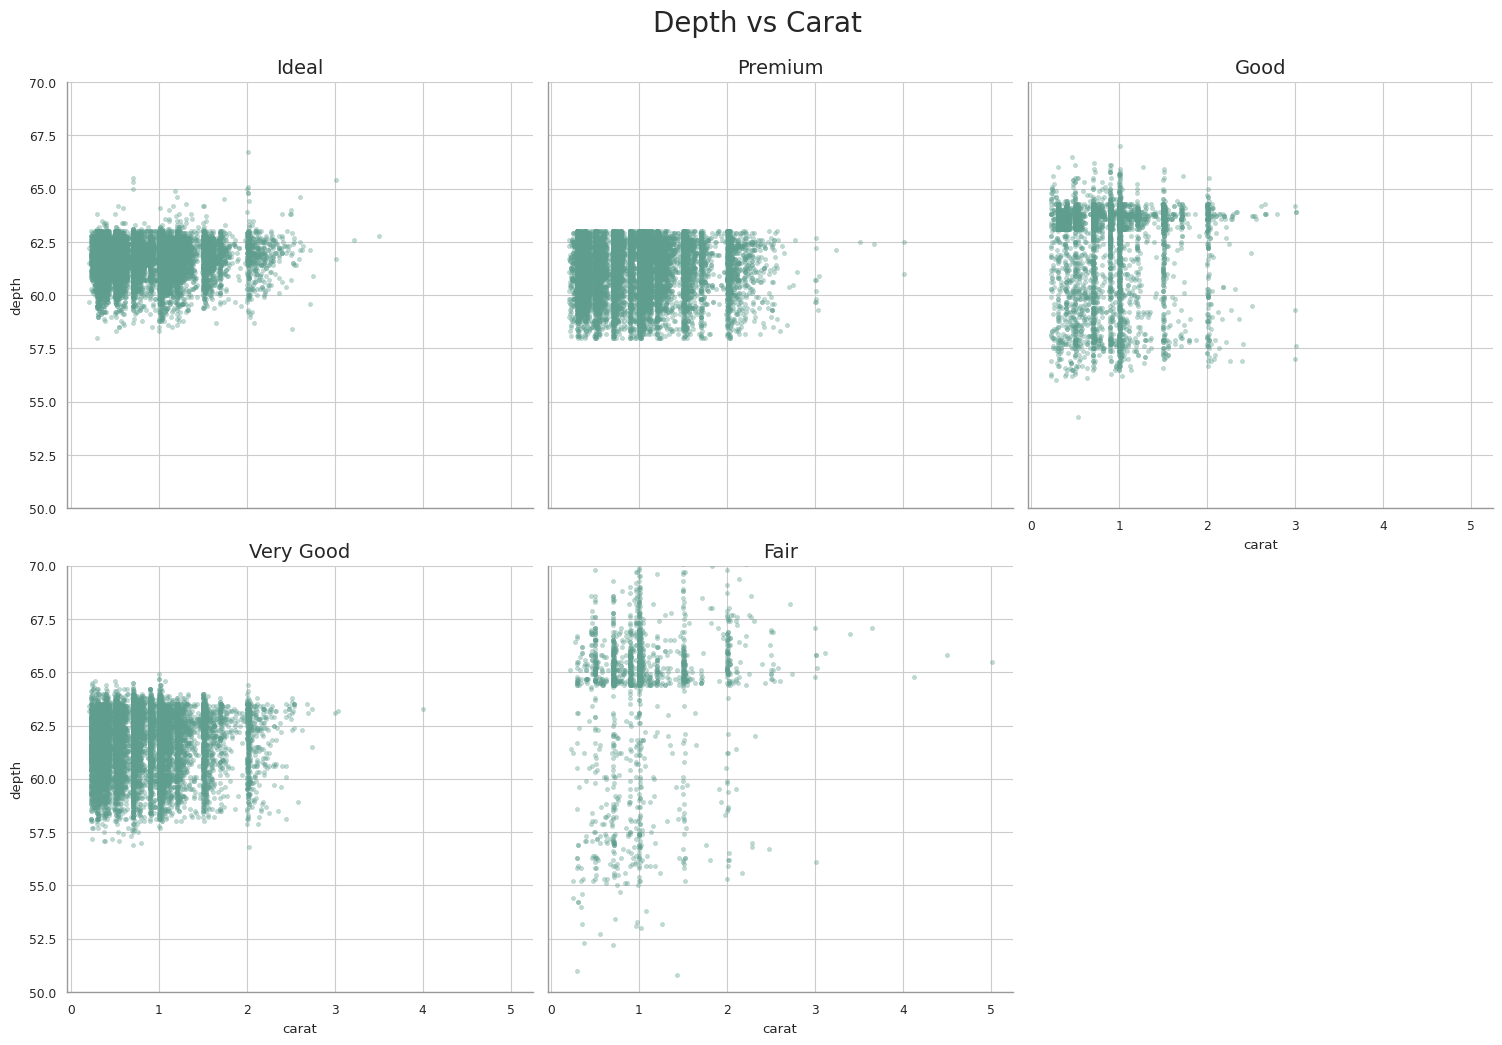

In [24]:
with sns.axes_style("whitegrid", rc={"axes.edgecolor": "0.6"}):
    dc = sns.relplot(data=data,
                        x="carat", 
                        y="depth", 
                        col="cut", 
                        col_wrap=3,
                        alpha=0.4, 
                        s=10, 
                        edgecolor='face', 
                       color='xkcd:dull teal', 
                       )
    dc.set(ylim=(50,70))
    dc.set_titles(col_template="{col_name}", size=14)
    dc.figure.suptitle("Depth vs Carat", x=0.5, y=1.04, fontsize=20, fontweight="book")

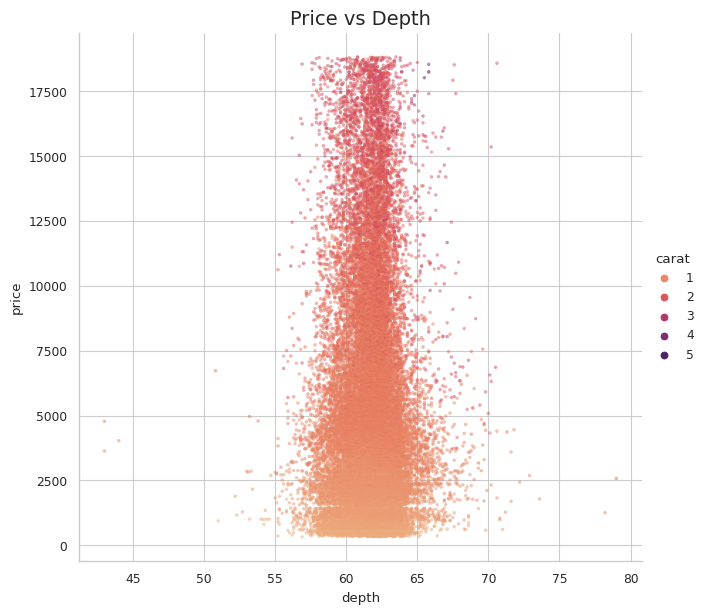

In [25]:
with sns.axes_style("whitegrid"):
    pd = sns.relplot(
        data=data,
        x="depth",
        y="price",
        hue="carat",
        alpha=0.5, 
        s=5,
        edgecolor="face",
        palette=sns.color_palette("flare", as_cmap=True),
        height=6,
        aspect=1.1
    )
    pd.ax.set_title("Price vs Depth", fontsize=14, fontweight="book")

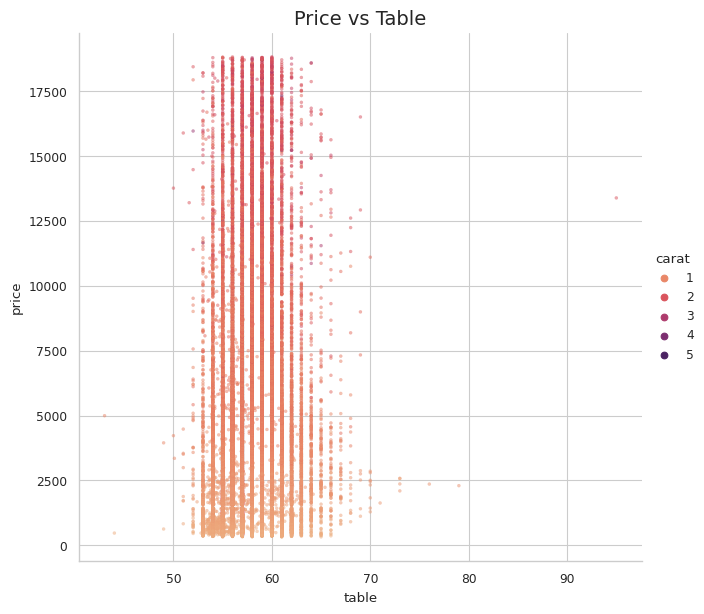

In [26]:
with sns.axes_style("whitegrid"):
    pt = sns.relplot(
        data=data,
        x="table",
        y="price",
        hue="carat",
        alpha=0.5, 
        s=5,
        edgecolor="face",
        palette=sns.color_palette("flare", as_cmap=True),
        height=6,
        aspect=1.1
    )
    pt.ax.set_title("Price vs Table", fontsize=14, fontweight="book")

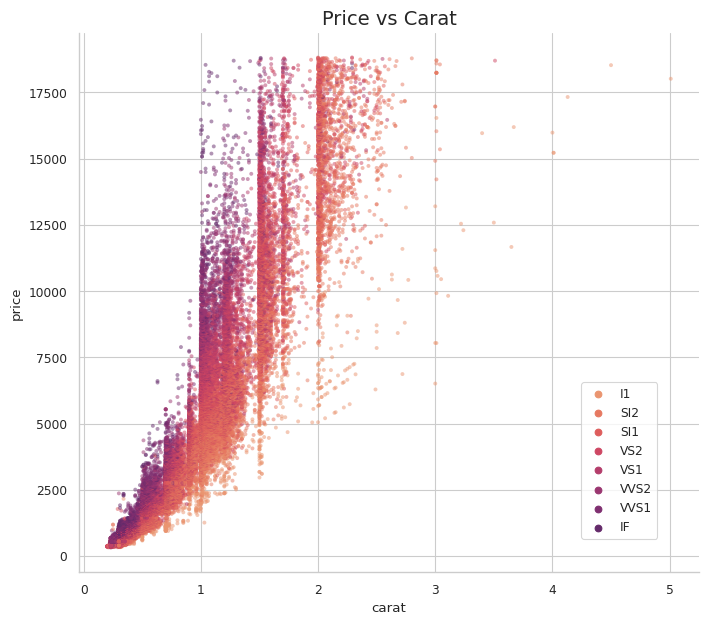

In [27]:
with sns.axes_style("whitegrid"):
    clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
    plt.figure(figsize=(8,7))
    sns.scatterplot(data=data,
                    x="carat", 
                    y="price",
                    hue="clarity", 
                    palette="flare",
                    s=8,
                    hue_order=clarity_ranking,
                    linewidth=0,
                    alpha=0.5,
                   ).set_title("Price vs Carat", fontsize=14, fontweight="book")
    sns.despine(top=True, right=True)
    plt.legend(loc='lower left', bbox_to_anchor=(0.8, 0.05))
    

Text(0.5, 1.05, 'Clarity vs feature variables(Mean)')

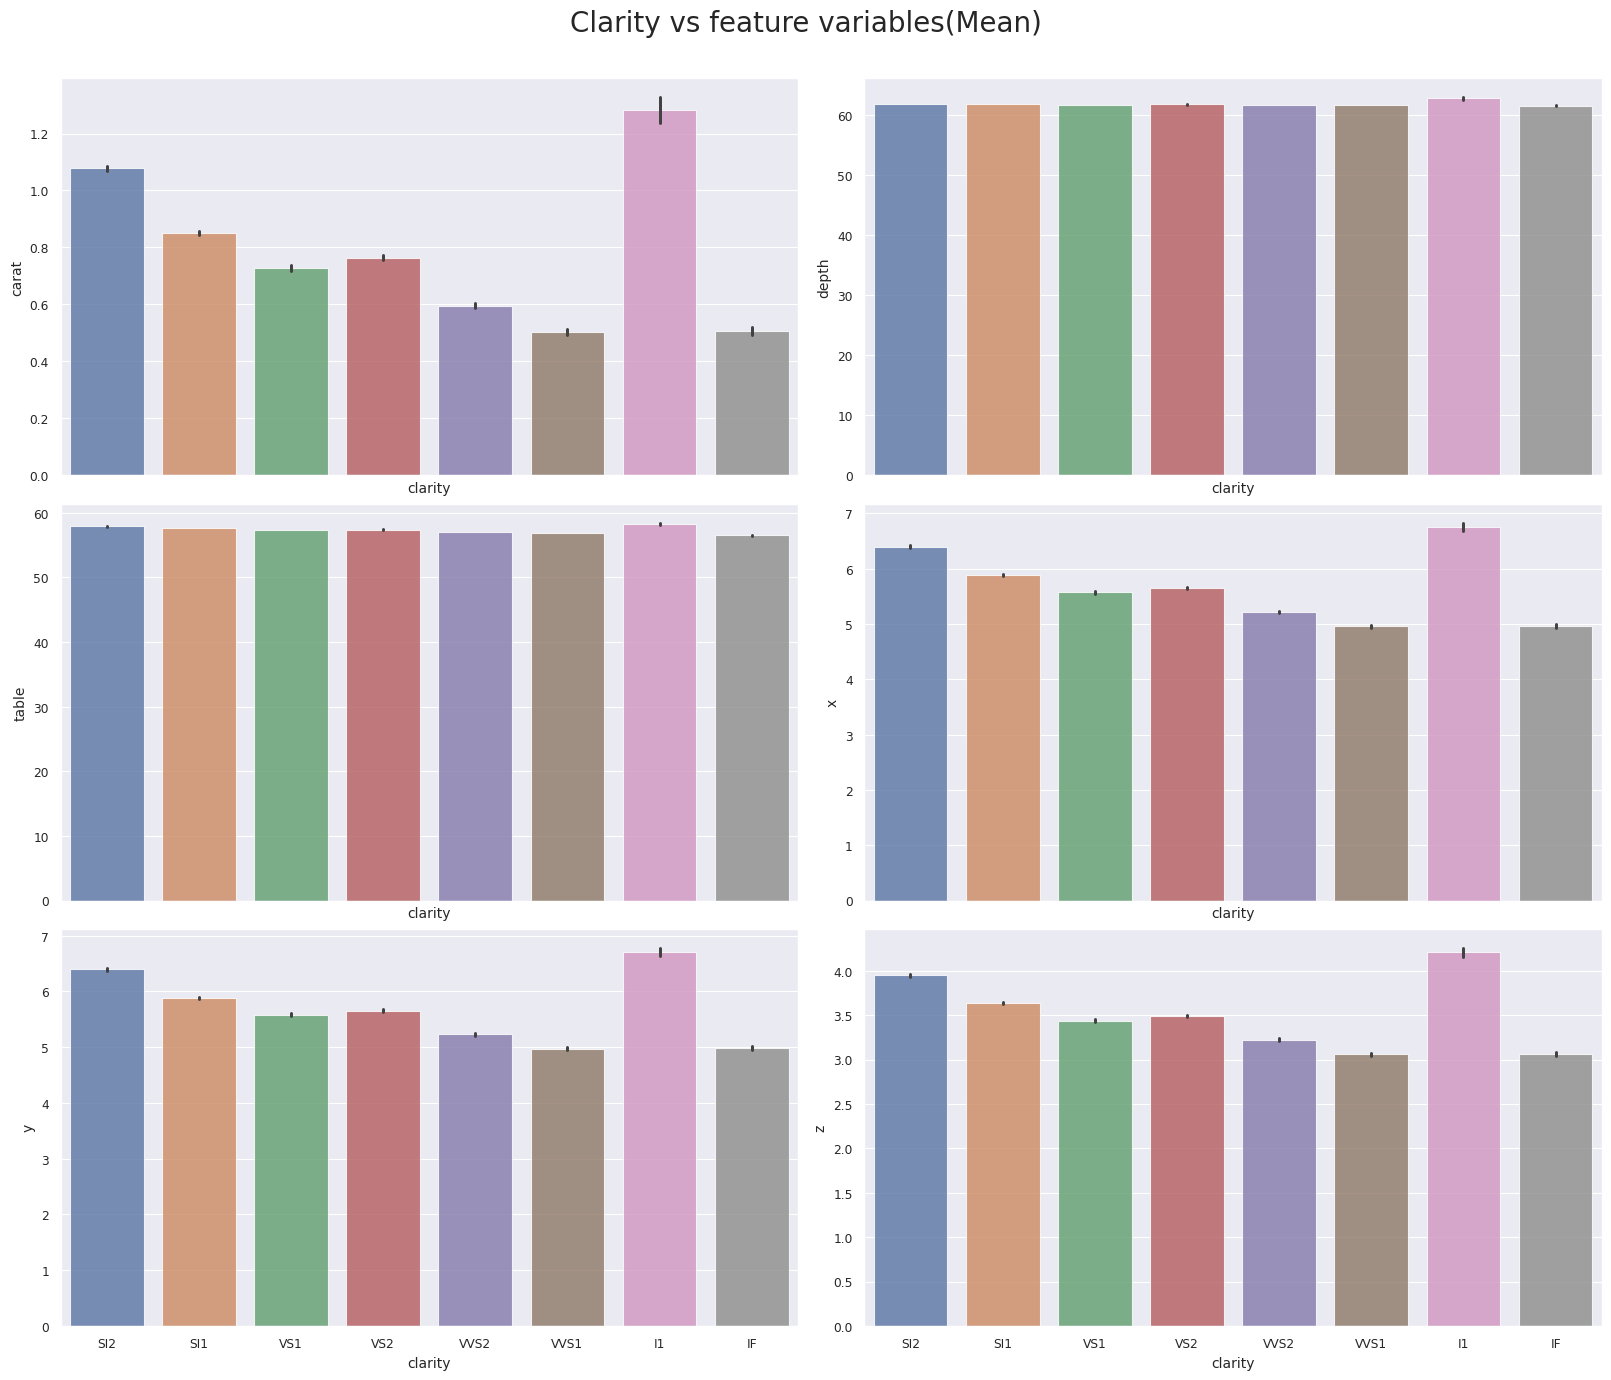

In [28]:
clarbar_fig, _ = plt.subplots(3,2, figsize=(16,13), sharex=True, layout='constrained')

axs = clarbar_fig.axes

for i, col in enumerate(num_vars.columns):
    sns.barplot(data=data, y=col, x='clarity', dodge=False, hue='clarity', ax=axs[i], alpha=0.8)
    axs[i].legend().remove()
    axs[i].set_xlabel(axs[i].get_xlabel(),fontsize=10)
    axs[i].set_ylabel(axs[i].get_ylabel(), fontsize=10)

clarbar_fig.suptitle(
        "Clarity vs feature variables(Mean)", 
        x=0.5, 
        y=1.05, 
        fontsize=20, 
        fontweight="book"
    )

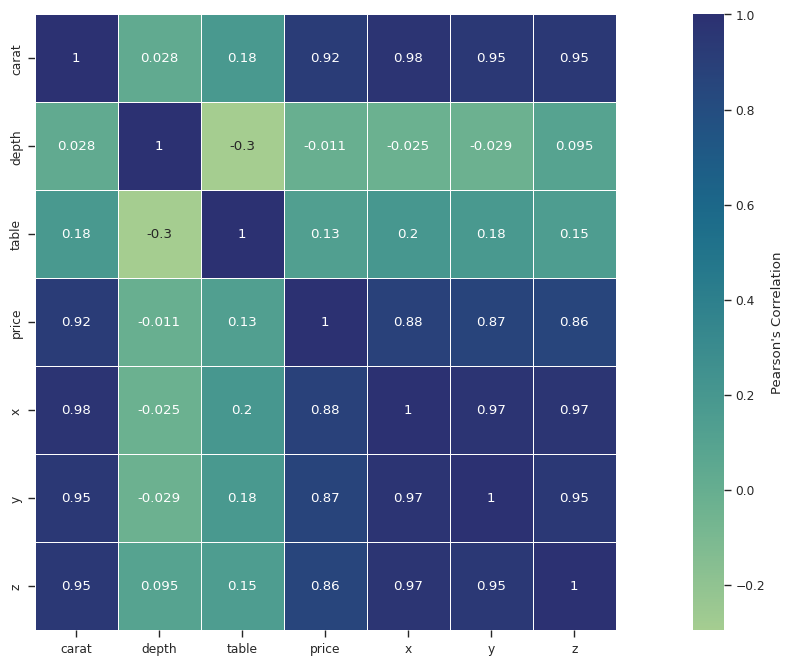

In [29]:
with sns.axes_style(rc={'xtick.bottom': True, 'ytick.left': True}):
    hmap_fig, axh = plt.subplots(figsize=(10,8))
    sns.heatmap(
        data=data.corr(numeric_only=True), 
        cmap='crest', 
        annot=True,
        linewidth=0.5,
        ax=axh,
        cbar_kws=dict(anchor=(0, 0.5), label="Pearson's Correlation", pad=0.1)
    )